In [1]:
from z3 import *

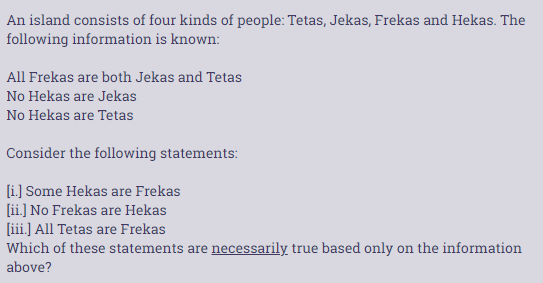

In [2]:
Object = DeclareSort('Object')

isFreka = Function('isFreka', Object, BoolSort())
isJeka = Function('isJeka', Object, BoolSort())
isTeta = Function('isTeta', Object, BoolSort())
isHeka = Function('isHeka', Object, BoolSort())

In [3]:
x = Const('x', Object)

p1 = ForAll([x], Implies(isFreka(x), And(isJeka(x), isTeta(x))))
p2 = ForAll([x], Implies(isHeka(x), Not(isJeka(x))))
p3 = ForAll([x], Implies(isHeka(x), Not(isTeta(x))))

s1 = Exists([x], Implies(isHeka(x), isFreka(x)))
s2 = ForAll([x], Implies(isFreka(x), Not(isHeka(x))))
s3 = ForAll([x], Implies(isTeta(x), isFreka(x)))

In [9]:
s = Solver()
s.add(p1, p2, p3)

In [10]:
# check statement i
s.push()
s.add(s1)
s.check()

sat

In [11]:
# check statement ii
s.pop()
s.push()
s.add(s2)
s.check()

sat

In [12]:
# check statement ii
s.pop()
s.push()
s.add(s3)
s.check()

sat

In [13]:
s

[ForAll(x, Implies(isFreka(x), And(isJeka(x), isTeta(x)))),
 ForAll(x, Implies(isHeka(x), Not(isJeka(x)))),
 ForAll(x, Implies(isHeka(x), Not(isTeta(x)))),
 ForAll(x, Implies(isTeta(x), isFreka(x)))]